First, let's import everything we need, and load some kinematic viscosity data:

In [1]:
# Import the Graph Operator - handles data preparation, model creation/recall, hand-off of data to model
from graphchem import GraphOperator

In [2]:
# Other dependencies are for data segmentation, set metric calculations, plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# Load some kinematic viscosity data
from graphchem.datasets import load_kv
smiles, kv = load_kv()
print(smiles[:3], '\n', kv[:3])

['CCC', 'CCCC', 'CCCCC'] 
 [[0.1858], [0.2586], [0.3397]]


In [4]:
# Create training, testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    smiles, kv, test_size=0.20, random_state=42
)
print(len(X_train), len(y_train), len(X_test), len(y_test))

170 170 43 43


We need to set up some variables for our training process (i.e. hyper-parameters). In the future, these will be tunable to reduce model error.

In [5]:
training_config = {
    'task': 'graph',
    'valid_size': 0.2,
    'valid_epoch_iter': 1,
    'valid_patience': 48,
    'batch_size': 32,
    'learning_rate': 0.002,
    'lr_decay': 0.0000001,
    'epochs': 500,
    'verbose': 1
}

We also need to define our model's architecture:

In [6]:
model_config = {
    'n_messages': 2,
    'n_hidden': 3,
    'hidden_msg_dim': 128,
    'hidden_dim': 256,
    'dropout': 0.01
}

Now let's initialize the Graph Operator, and train our model:

In [7]:
go = GraphOperator(config=training_config)
go.train(X_train, y_train, model_config=model_config)

/Users/tjkessler/anaconda3/envs/torch_geometric/lib/python3.8/site-packages/graphchem-1.0.0-py3.8.egg/graphchem/operator.py:43: UserWarning: device config value not found: default value set, cpu
  warnings.warn(


Epoch: 0 | Train Loss: 2877.747853503508 | Valid Loss: 22.74277114868164
Epoch: 1 | Train Loss: 70.35252111098346 | Valid Loss: 22.74277114868164
Epoch: 2 | Train Loss: 47.70107617097742 | Valid Loss: 21.0767822265625
Epoch: 3 | Train Loss: 25.69715454999138 | Valid Loss: 1.1933374404907227
Epoch: 4 | Train Loss: 5.320629736956428 | Valid Loss: 1.1933374404907227
Epoch: 5 | Train Loss: 3.4492799955255844 | Valid Loss: 0.8318580389022827
Epoch: 6 | Train Loss: 2.0162815732114456 | Valid Loss: 0.43802472949028015
Epoch: 7 | Train Loss: 1.1653664830852957 | Valid Loss: 0.3557780385017395
Epoch: 8 | Train Loss: 1.4279821269652422 | Valid Loss: 0.3557780385017395
Epoch: 9 | Train Loss: 1.0025721507913925 | Valid Loss: 0.3557780385017395
Epoch: 10 | Train Loss: 1.106900187099681 | Valid Loss: 0.3557780385017395
Epoch: 11 | Train Loss: 1.027899195166195 | Valid Loss: 0.3557780385017395
Epoch: 12 | Train Loss: 1.0829279282513786 | Valid Loss: 0.3557780385017395
Epoch: 13 | Train Loss: 1.043955

Epoch: 108 | Train Loss: 0.322352656546761 | Valid Loss: 0.21324753761291504
Epoch: 109 | Train Loss: 0.21748998761177063 | Valid Loss: 0.21324753761291504
Epoch: 110 | Train Loss: 0.21647034147206476 | Valid Loss: 0.21324753761291504
Epoch: 111 | Train Loss: 0.20741422562038198 | Valid Loss: 0.21324753761291504
Epoch: 112 | Train Loss: 0.23360887651934342 | Valid Loss: 0.21324753761291504
Epoch: 113 | Train Loss: 0.24542203370262594 | Valid Loss: 0.21324753761291504
Epoch: 114 | Train Loss: 0.14454890568466747 | Valid Loss: 0.21324753761291504
Epoch: 115 | Train Loss: 0.23318796648698695 | Valid Loss: 0.21324753761291504
Epoch: 116 | Train Loss: 0.2832256327657139 | Valid Loss: 0.21324753761291504
Epoch: 117 | Train Loss: 0.3095019608736038 | Valid Loss: 0.21324753761291504
Epoch: 118 | Train Loss: 0.33066677652737675 | Valid Loss: 0.19534897804260254
Epoch: 119 | Train Loss: 0.198169305044062 | Valid Loss: 0.19534897804260254
Epoch: 120 | Train Loss: 0.2486540850471048 | Valid Loss: 

Let's get predictions, then calculate prediction errors for the training and testing subsets:

In [8]:
y_train_pred = go.use(X_train)
y_test_pred = go.use(X_test)

mae_test = median_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = median_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test Set: R2 = {}, MAE = {}'.format(r2_test, mae_test))
print('Train Set: R2 = {}, MAE = {}'.format(r2_train, mae_train))

Test Set: R2 = 0.8678852368796849, MAE = 0.22964120121002196
Train Set: R2 = 0.8553695314829475, MAE = 0.2418900151312351


And let's plot our results:

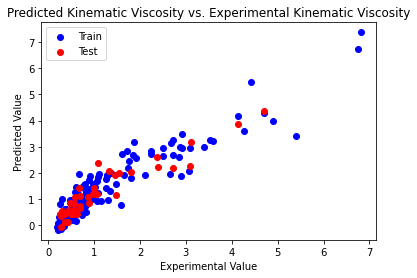

In [9]:
plt.title('Predicted Kinematic Viscosity vs. Experimental Kinematic Viscosity')
plt.xlabel('Experimental Value')
plt.ylabel('Predicted Value')
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.legend(loc='upper left')
plt.show()